In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
data = pd.read_csv('Electric_Production.csv',index_col=0)

In [13]:
data.info

<bound method DataFrame.info of             IPG2211A2N
DATE                  
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151
...                ...
2017-09-01     98.6154
2017-10-01     93.6137
2017-11-01     97.3359
2017-12-01    114.7212
2018-01-01    129.4048

[397 rows x 1 columns]>

In [14]:
data.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [15]:
data.isnull().sum()

IPG2211A2N    0
dtype: int64

In [16]:
data[data.duplicated()]

,IPG2211A2N
DATE,


In [19]:
data.index = pd.to_datetime(data.index)

In [20]:
data.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [23]:
data.columns =['energy production']

In [24]:
data.head()

,energy production
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


Text(0.5, 1.0, 'energy production per year')

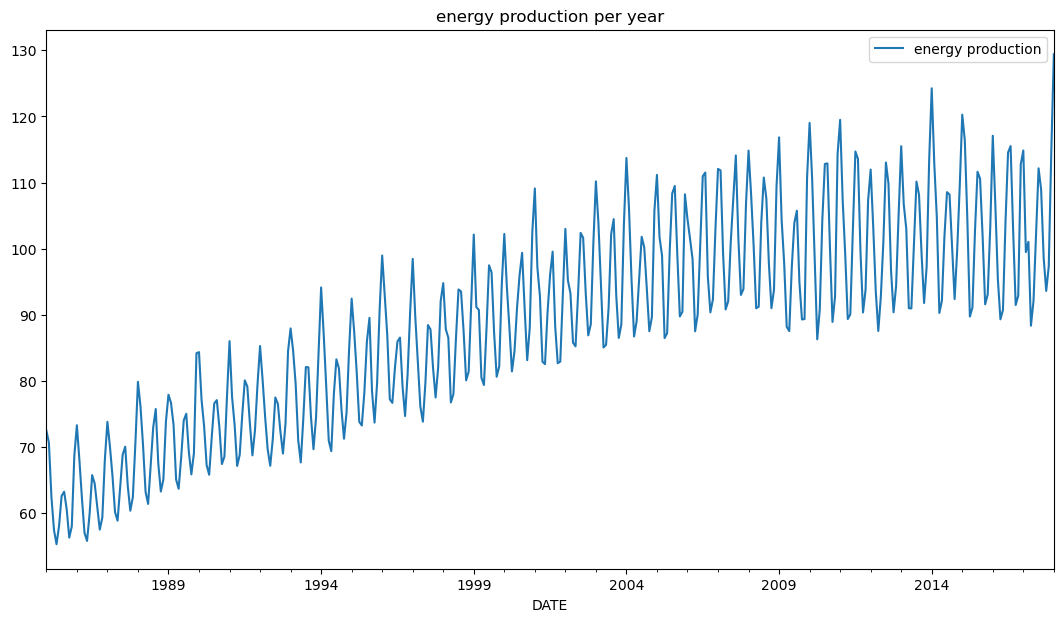

In [29]:
data.plot(figsize=(13,7))
plt.title("energy production per year")

In [31]:
from statsmodels.tsa.stattools import adfuller

In [36]:
def adf_test(series):
    result = adfuller(series)
    print("ADF statistics:{}".format(result[0]))
    print('p-value:{}'.format(result[1]))
    if(result[1]<=0.05):
        print("strong evidence aginst the null hypothesis,reject the null hypothesis")
    else:
        print("weak evidence aginst the null hypothesis,time series has a unit root, indicatling it is non-stationary")


In [37]:
adf_test(data['energy production'])

ADF statistics:-2.25699035004723
p-value:0.18621469116587275
weak evidence aginst the null hypothesis,time series has a unit root, indicatling it is non-stationary


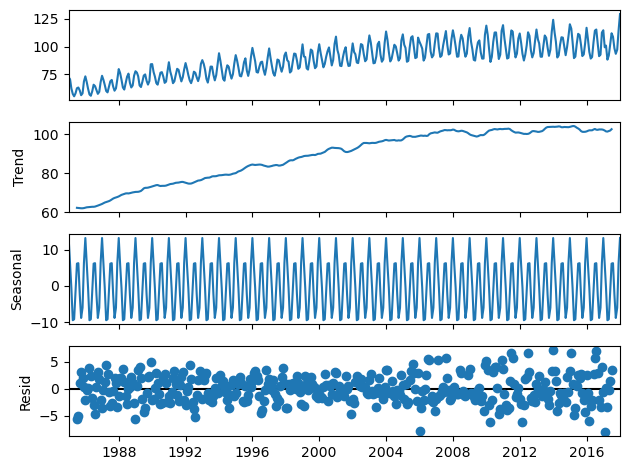

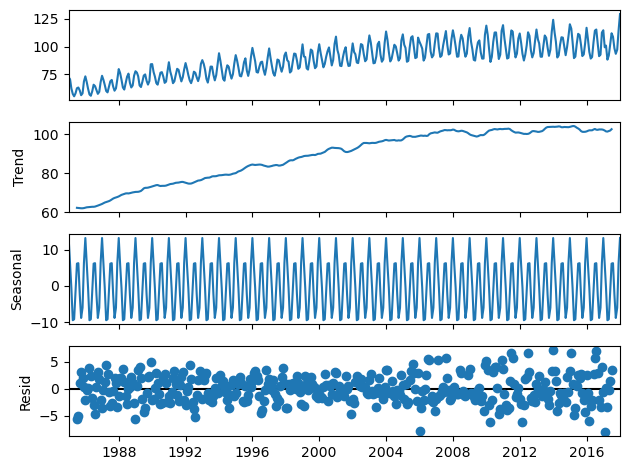

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data,model='additive')
result.plot()

In [40]:
!pip install pmdarima

In [43]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(data,start_p=1,start_q=1,max_p=3,max_q=3,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
print(stepwise_model.aic())

## the aic value allow us how well the a model fits a data and takes into the count the complexity of the model
## so model that have the better fit while using fewer feature will receive a better aic score then similar models that utilise more features

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1785.652, Time=0.87 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2010.162, Time=0.49 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1940.101, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1835.298, Time=0.27 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.44 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1787.226, Time=0.57 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1786.885, Time=3.27 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1872.182, Time=0.44 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=1785.329, Time=1.89 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=1770.670, Time=1.74 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=1773.643, Time=1.89 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=1814.635, Time=1.56 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=1835.292, Time=1.56 sec
 ARIMA(2,1,1)(2,1,2)[12]             : AIC=1772.091, Time=4.58 sec
 ARIMA(1,1,2)(2,1,2)[12]

In [46]:
train = data.loc['1985-01-01':'2015-12-01']
test = data.loc['2016-01-01':]

In [47]:
len(test)

25

In [48]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True)

In [49]:
future_forecast = stepwise_model.predict(n_periods=25)

In [50]:
future_forecast

2016-01-01    114.758839
2016-02-01    108.960853
2016-03-01    100.847756
2016-04-01     89.647217
2016-05-01     91.573050
2016-06-01    102.423911
2016-07-01    112.012166
2016-08-01    110.758766
2016-09-01    100.372331
2016-10-01     91.754019
2016-11-01     94.939978
2016-12-01    108.142705
2017-01-01    117.812788
2017-02-01    109.544752
2017-03-01    101.674802
2017-04-01     90.189416
2017-05-01     92.003001
2017-06-01    102.387675
2017-07-01    111.476349
2017-08-01    110.300881
2017-09-01    100.101162
2017-10-01     91.920385
2017-11-01     96.250082
2017-12-01    109.379475
2018-01-01    118.961268
Freq: MS, dtype: float64

In [51]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])

In [52]:
future_forecast

,Prediction
DATE,
2016-01-01,114.758839
2016-02-01,108.960853
2016-03-01,100.847756
2016-04-01,89.647217
2016-05-01,91.573050
2016-06-01,102.423911
2016-07-01,112.012166
2016-08-01,110.758766
2016-09-01,100.372331


<Axes: xlabel='DATE'>

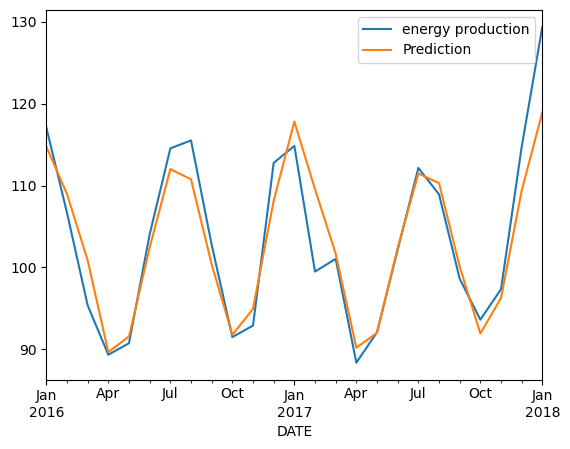

In [53]:
pd.concat([test,future_forecast],axis=1).plot()

In [57]:
df = pd.concat([test,future_forecast],axis=1)
df

,energy production,Prediction
DATE,,
2016-01-01,117.0837,114.758839
2016-02-01,106.6688,108.960853
2016-03-01,95.3548,100.847756
2016-04-01,89.3254,89.647217
2016-05-01,90.7369,91.573050
2016-06-01,104.0375,102.423911
2016-07-01,114.5397,112.012166
2016-08-01,115.5159,110.758766
2016-09-01,102.7637,100.372331


In [61]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(df['energy production'],df['Prediction']))
print(rmse)

3.818655493997859


In [63]:
index_future_dates = pd.date_range(start='2018-01-01',end ='2018-01-10')
pred = stepwise_model.predict(start = len(test),end=len(future_forecast)+10,type='levels').rename('ARIMA Prediction')

pred.index = index_future_dates
print(pred)

2018-01-01    114.758839
2018-01-02    108.960853
2018-01-03    100.847756
2018-01-04     89.647217
2018-01-05     91.573050
2018-01-06    102.423911
2018-01-07    112.012166
2018-01-08    110.758766
2018-01-09    100.372331
2018-01-10     91.754019
Freq: D, Name: ARIMA Prediction, dtype: float64


<Axes: >

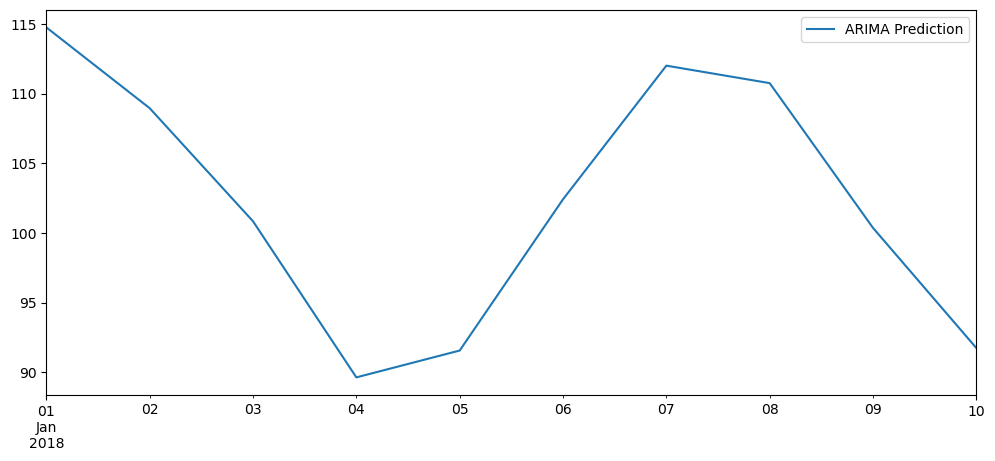

In [65]:
pred.plot(figsize=(12,5),legend= True)